### Fruit Image Detection

##### Import all necessary modules and libraries

In [608]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import glob
import os
from sklearn.model_selection import train_test_split
%matplotlib inline

In [609]:
image=[]
for img in glob.glob("C:/Lakshmi/Computer Vision/Fruit Images/train_zip/train/*.jpg"):
    cv_img=cv2.imread(img)
    image.append(cv_img)

In [610]:
type(image)

list

In [611]:
img=cv2.imread("C:/Lakshmi/Computer Vision/Fruit Images/train_zip/train/apple_1.jpg")

In [612]:
type(img)

numpy.ndarray

In [613]:
img.shape

(349, 349, 3)

In [614]:
image=np.array(image)

In [615]:
type(image)

numpy.ndarray

In [616]:
image.shape

(240,)

### Load training data

In [619]:
train_images=[]
train_labels=[]
shape=(128,128)
train_data_path="C:/Lakshmi/Computer Vision/Fruit Images/train_zip/train"

for filename in os.listdir("C:/Lakshmi/Computer Vision/Fruit Images/train_zip/train"):
    if filename.split('.')[1]=="jpg":
        img=cv2.imread(os.path.join(train_data_path,filename))
        
        #Convert the images from BGR to RGB
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        
        #Split filenames and store labels in list
        train_labels.append(filename.split('_')[0])
        
        #resize the images
        img=cv2.resize(img,shape)
        train_images.append(img)      


### Load testing data

In [620]:
test_images=[]
test_labels=[]
shape=(128,128)
test_data_path="C:/Lakshmi/Computer Vision/Fruit Images/test_zip/test"

for filename in os.listdir("C:/Lakshmi/Computer Vision/Fruit Images/test_zip/test"):
    if filename.split('.')[1]=="jpg":
        img=cv2.imread(os.path.join(test_data_path,filename))
        
        #convert the images from BGR to RGB
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        
        #Split filenames and store labels in list
        test_labels.append(filename.split('_')[0])
        
        #resize the images
        img=cv2.resize(img,shape)
        test_images.append(img)   
        

### Print training and test set shape

In [621]:
#Convert the images in to an array
train_images=np.array(train_images)
test_images=np.array(test_images)

print("Training Data Shape",train_images.shape)
print("Testing Data Shape",test_images.shape)

#find the unique number from the training labels
classes=np.unique(train_labels)
nclasses=len(classes)
print("Classes",classes)
print("No of classess",len(np.unique(train_labels)))

Training Data Shape (240, 128, 128, 3)
Testing Data Shape (60, 128, 128, 3)
Classes ['apple' 'banana' 'mixed' 'orange']
No of classess 4


##### Convert categorical values into dummy variables

In [622]:
train_labels = pd.get_dummies(train_labels).values
#test_labels=pd.get_dummies(test_labels).values

### Checking out the data

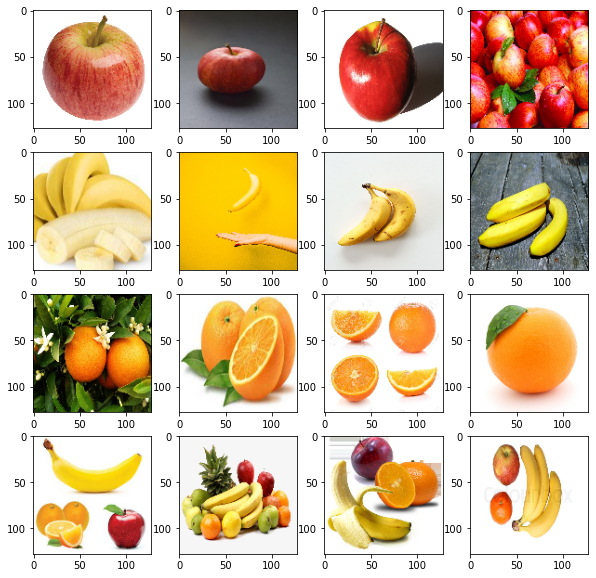

In [623]:
fig=plt.figure(figsize=(10,10))
plt.axis("off")
ax=fig.add_subplot(441)
ax.imshow(train_images[1])
ax=fig.add_subplot(442)
ax.imshow(train_images[27])
ax=fig.add_subplot(443)
ax.imshow(train_images[10])
ax=fig.add_subplot(444)
ax.imshow(train_images[22])
ax=fig.add_subplot(445)
ax.imshow(train_images[97])
ax=fig.add_subplot(446)
ax.imshow(train_images[147])
ax=fig.add_subplot(447)
ax.imshow(train_images[122])
ax=fig.add_subplot(448)
ax.imshow(train_images[86])
ax=fig.add_subplot(449)
ax.imshow(train_images[195])
ax=fig.add_subplot(4,4,10)
ax.imshow(train_images[169])
ax=fig.add_subplot(4,4,11)
ax.imshow(train_images[192])
ax=fig.add_subplot(4,4,12)
ax.imshow(train_images[200])
ax=fig.add_subplot(4,4,13)
ax.imshow(train_images[158])
ax=fig.add_subplot(4,4,14)
ax.imshow(train_images[156])
ax=fig.add_subplot(4,4,15)
ax.imshow(train_images[155])
ax=fig.add_subplot(4,4,16)
ax.imshow(train_images[149])


##### Change the color image into grayscale image

In [624]:
gray_images=[]
for filename in os.listdir("C:/Lakshmi/Computer Vision/Fruit Images/train_zip/train"):
    if filename.split('.')[1]=="jpg":
        img=cv2.imread(os.path.join(train_data_path,filename),cv2.IMREAD_GRAYSCALE)
        gray_images.append(img) 

In [625]:
gray_images[1].shape

(1500, 1500)

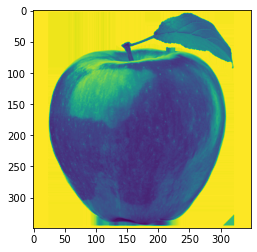

In [626]:
plt.imshow(gray_images[0])

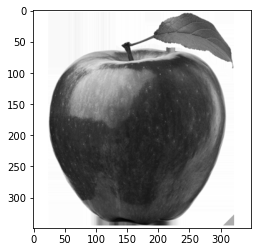

In [627]:
plt.imshow(gray_images[0],cmap='gray')

In [628]:
gray_images[0].shape

(349, 349)

In [629]:
gray_images[0].max()

255

In [630]:
#%history

##### Split the training data into train and validation set

In [631]:
X_train,X_val,y_train,y_val=train_test_split(train_images,train_labels,random_state=1)

In [632]:
print("X train shape",X_train.shape)
print("X val shape",X_val.shape)
print("y train shape",y_train.shape)
print("y val shape",y_val.shape)

X train shape (180, 128, 128, 3)
X val shape (60, 128, 128, 3)
y train shape (180, 4)
y val shape (60, 4)


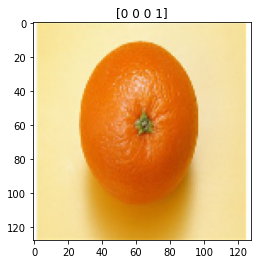

In [633]:
img=X_train[15]
plt.imshow(img)
plt.title(y_train[15])
plt.show()

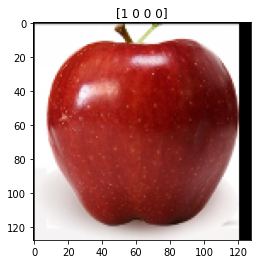

In [634]:
img=X_train[179]
plt.imshow(img)
plt.title(y_train[179])
plt.show()

### Training the model

In [635]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPooling2D

In [636]:
model=Sequential()

# model.add(Conv2D(filters=30,kernel_size=(3,3),padding="same",activation="relu",input_shape=(128,128,3)))
# model.add(MaxPooling2D())

# model.add(Conv2D(filters=30,kernel_size=(3,3),padding="same",activation="relu"))
# model.add(MaxPooling2D())

# model.add(Conv2D(filters=30,kernal_size=(3,3),padding="same",activation="relu"))
# model.add(MaxPooling2D())

# model.add(Conv2D(filters=30,kernal_size=(3,3),padding="same",activation="relu"))
# model.add(MaxPooling2D())


model.add(Conv2D(filters=30,kernel_size=(3,3),padding="same",activation="relu",input_shape=(128,128,3)))
model.add(MaxPooling2D())

model.add(Conv2D(filters=30,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters=30,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(filters=30,kernel_size=(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(206,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(103,activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(4,activation="softmax"))

In [637]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_124 (Conv2D)          (None, 128, 128, 30)      840       
_________________________________________________________________
max_pooling2d_123 (MaxPoolin (None, 64, 64, 30)        0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 64, 64, 30)        8130      
_________________________________________________________________
max_pooling2d_124 (MaxPoolin (None, 32, 32, 30)        0         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 32, 32, 30)        8130      
_________________________________________________________________
max_pooling2d_125 (MaxPoolin (None, 16, 16, 30)        0         
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 16, 16, 30)      

In [638]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [639]:
#Divide it by 255 to normalize the channels.
X_train=X_train/255.0
X_val=X_val/255.0

In [640]:
hist=model.fit(X_train,y_train,batch_size=30,epochs=100,validation_data=(X_val,y_val))

Train on 180 samples, validate on 60 samples
Epoch 1/100
180/180 [==============================] - 3s 19ms/step - loss: 1.3874 - accuracy: 0.2611 - val_loss: 1.2608 - val_accuracy: 0.3333
Epoch 2/100
180/180 [==============================] - 3s 16ms/step - loss: 1.3203 - accuracy: 0.3444 - val_loss: 1.2928 - val_accuracy: 0.3167
Epoch 3/100
180/180 [==============================] - 2s 13ms/step - loss: 1.3149 - accuracy: 0.3333 - val_loss: 1.2533 - val_accuracy: 0.2833
Epoch 4/100
180/180 [==============================] - 3s 14ms/step - loss: 1.2955 - accuracy: 0.3667 - val_loss: 1.2070 - val_accuracy: 0.6500
Epoch 5/100
180/180 [==============================] - 2s 14ms/step - loss: 1.2223 - accuracy: 0.4444 - val_loss: 1.0546 - val_accuracy: 0.6500
Epoch 6/100
180/180 [==============================] - 3s 14ms/step - loss: 1.0781 - accuracy: 0.5944 - val_loss: 0.7677 - val_accuracy: 0.8333
Epoch 7/100
180/180 [==============================] - 3s 15ms/step - loss: 0.8958 - accura

In [641]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [642]:
model.evaluate(X_val,y_val)[1]*100

60/60 [==============================] - 0s 4ms/step


96.66666388511658

### Analysis after Model Training

##### Training Curve

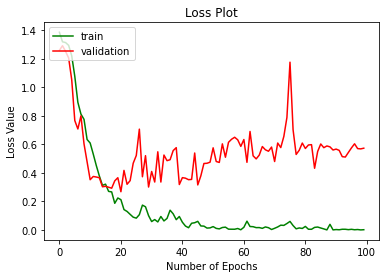

In [643]:
plt.plot(hist.history['loss'],color='green',label='Train Loss')
plt.plot(hist.history['val_loss'],color='red',label='validation Loss')
plt.title("Loss Plot")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss Value")
plt.legend(['train','validation'],loc='upper left')
plt.show()

##### Validation Curve

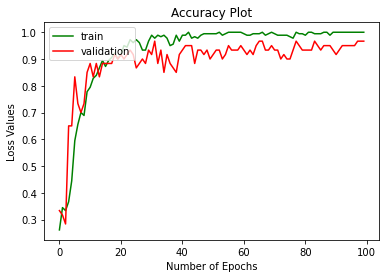

In [644]:
plt.plot(hist.history['accuracy'],color='green',label='Training Accuracy')
plt.plot(hist.history['val_accuracy'],color='red',label='Validation Accuracy')
plt.title("Accuracy Plot")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss Values")
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [645]:
prediction=model.predict(X_val)

In [646]:
from copy import deepcopy
predicted_classes=deepcopy(prediction)
predicted_classes=np.argmax(predicted_classes,axis=1)
y_true=np.argmax(y_val,axis=1)
print("y Predicted class shape",predicted_classes.shape)
print("y True shape",y_true.shape)

y Predicted class shape (60,)
y True shape (60,)


##### Classification Report

In [647]:
from sklearn.metrics import classification_report,confusion_matrix

In [648]:
print(classification_report(y_true,predicted_classes))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.94      0.97        18
           2       0.75      1.00      0.86         3
           3       1.00      0.94      0.97        17

    accuracy                           0.97        60
   macro avg       0.93      0.97      0.94        60
weighted avg       0.97      0.97      0.97        60



##### Confusion Martix

In [649]:
print(confusion_matrix(y_true,predicted_classes))


[[22  0  0  0]
 [ 1 17  0  0]
 [ 0  0  3  0]
 [ 0  0  1 16]]


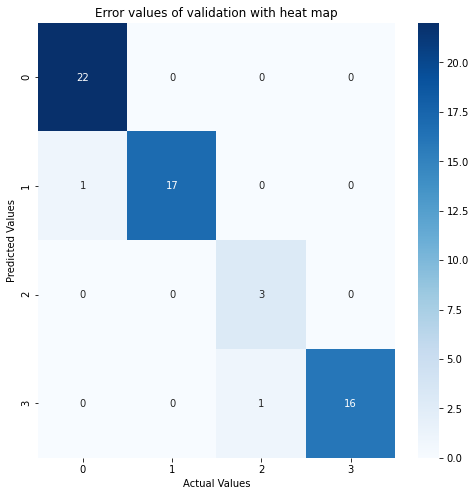

In [650]:
cfm=confusion_matrix(y_true,predicted_classes)
fig,ax=plt.subplots(figsize=(8,8))
sns.heatmap(cfm,cmap="Blues",fmt=".0f",annot=True)
plt.title("Error values of validation with heat map")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


In [651]:
Evaluating model on validation data
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

Testing predictions and the actual label
checkImage = test_images[0:1]
checklabel = test_labels[0:1]

predict = model.predict(np.array(checkImage))

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

In order to feed the image to the predict method, you will need to load it and convert it to an array 
—remembering to divide it by 255 to normalize the channels.

loaded_image = k.preprocessing.image.load_img(path=PREDICTION_PATH+'/'+filename, target_size=(IMG_WIDTH,IMG_HEIGHT,CHANNELS))
#convert to array and resample dividing by 255
img_array = k.preprocessing.image.img_to_array(loaded_image) / 255.
 
#add sample dimension. the predictor is expecting (1, CHANNELS, IMG_WIDTH, IMG_HEIGHT)
img_np_array = np.expand_dims(img_array, axis = 0)
#img_class = my_model.predict_classes(img_np_array)
 
predictions = my_model.predict(img_np_array)

SyntaxError: invalid syntax (<ipython-input-651-2fc6b32e31c4>, line 1)

In [652]:
evaluate = model.evaluate(X_val,y_val)
print(evaluate)

60/60 [==============================] - 0s 3ms/step
[0.5738894422383358, 0.9666666388511658]


In [653]:
correct = np.nonzero(predicted_classes == y_true)[0]
incorrect = np.nonzero(predicted_classes != y_true)[0]

### Some of the correctly predicted classes

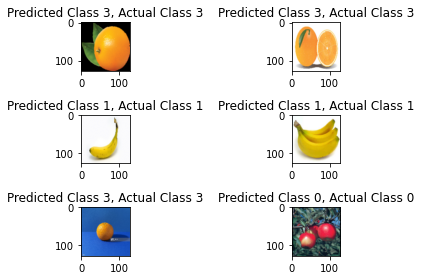

In [654]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.imshow(X_val[c], cmap="Blues", interpolation='bilinear')
    plt.title("Predicted Class {}, Actual Class {}".format(predicted_classes[c], y_true[c]))
    plt.tight_layout()
    i += 1

### Some of the incorretly predicted classes

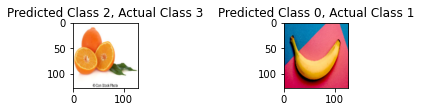

In [655]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.imshow(X_val[c], cmap="Blues", interpolation='bilinear')
    plt.title("Predicted Class {}, Actual Class {}".format(predicted_classes[c], y_true[c]))
    plt.tight_layout()
    i += 1

In [656]:
test_labels=pd.get_dummies(test_labels).values
test_images=test_images/255.0
evaluate = model.evaluate(test_images,test_labels)
print(evaluate)

60/60 [==============================] - 0s 7ms/step
[1.5162533839543662, 0.8833333253860474]


In [657]:
loss, acc = model.evaluate(test_images, test_labels)
print("Accuracy",acc)
print("Loss",loss)

60/60 [==============================] - 0s 8ms/step
Accuracy 0.8833333253860474
Loss 1.5162533839543662


## The complete code example for the test harness for the CIFAR-10 dataset is listed below.

In [ ]:
# test harness for evaluating models on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	# ...
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()